<a href="https://colab.research.google.com/github/hyenee99/visitor/blob/main/%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/인공지능/temp_visitor3.csv") #데이터 불러오기

grandpark_input=df[['month','temp','day','weather']].to_numpy() # 온도, 요일, 날씨를 특성으로 설정
grandpark_target=df['visitors'].to_numpy() # 방문객을 종속변수로 설정

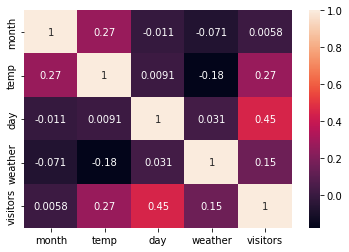

In [ ]:
import pandas as pd 
import seaborn as sns 

df = pd.read_csv('/content/drive/MyDrive/인공지능/temp_visitor3.csv') 
sns.heatmap(df.corr(), annot=True)

In [ ]:
# grandpark_input과 grandpark_target을 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(grandpark_input,grandpark_target,random_state=42)

In [ ]:
# 변환기 사용
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input) #fit() 메서드를 통해 새롭게 만들 특성 조합을 찾음


train_poly=poly.transform(train_input) # transform 메서드를 사용하여 train_input 데이터를 변환한 후 train_poly 에 저장
test_poly=poly.transform(test_input) #테스트 세트 또한 변환해줌
print(train_poly.shape) #14개의 특성을 가진 811개의 데이터 

# 예상 방문객 수를 구하기 위한 특성 온도,요일,날씨를 입력받음
month=int(input("달 입력: "))
temp=int(input("온도 입력:"))
day=int(input("요일 입력: "))
weather=int(input("날씨 입력: "))
new_input=[[month,temp,day,weather]] # new_input에 입력받은 데이터를 저장 

polyinput=poly.transform(new_input) # 예측을 위한 독립변수 또한 데이터를 변환해줌 

(811, 14)
달 입력: 5
온도 입력:15
요일 입력: 2
날씨 입력: 4


In [ ]:
# 9개의 특성을 만들고 난 뒤에 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target) # 훈련세트를 훈련
result=lr.predict(polyinput) # 3개의 특성에 의한 예상 방문객 수를 예측 
print('예측 결과: ',result) #예측 결과 (예상 방문객 수를 출력 )

print(lr.score(train_poly,train_target)) #훈련세트에 대한 점수
print(lr.score(test_poly,test_target)) #테스트 세트에 대한 점수 

if result<5000:
  print("혼잡도 : 여유")
elif result>=5000 and result<10000:
  print("혼잡도: 보통")
elif result>=10000 and result<20000:
  print("혼잡도 : 혼잡")
else:
  print("혼잡도: 매우 혼잡")

예측 결과:  [7715.57066562]
0.5047464431086056
0.4902567106271527
혼잡도: 보통


In [ ]:
# 타깃과 예측한 값 사이의 차이
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction=lr.predict(test_poly)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae=mean_absolute_error(test_target,test_prediction)
print(mae) #평균적으로 mae 정도 타깃값과 다르다는 것을 알 수 있음 

4592.562403173016
